In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from ROOT.Math import PtEtaPhiMVector as pepmv
f = uproot.open("dasntuples_gg_HH_bbbb_SM.root")['bbbbTree']
branches = f.keys()
print(branches)
df = f.arrays(branches,library="pd")
nEvents = len(df)

# Defining extra branches
df["j1"] = df.apply(lambda x: pepmv(x.jet1_pt,x.jet1_eta,x.jet1_phi,x.jet1_m),axis=1)
df["j2"] = df.apply(lambda x: pepmv(x.jet2_pt,x.jet2_eta,x.jet2_phi,x.jet2_m),axis=1)
df["j3"] = df.apply(lambda x: pepmv(x.jet3_pt,x.jet3_eta,x.jet3_phi,x.jet3_m),axis=1)
df["j4"] = df.apply(lambda x: pepmv(x.jet4_pt,x.jet4_eta,x.jet4_phi,x.jet4_m),axis=1)

df["j12"] = df.apply(lambda x: x.j1+x.j2,axis=1)
df["j34"] = df.apply(lambda x: x.j3+x.j4,axis=1)
df["j13"] = df.apply(lambda x: x.j1+x.j3,axis=1)
df["j24"] = df.apply(lambda x: x.j2+x.j4,axis=1)
df["j14"] = df.apply(lambda x: x.j1+x.j4,axis=1)
df["j23"] = df.apply(lambda x: x.j2+x.j3,axis=1)

['run', 'luminosityBlock', 'event', 'xs', 'btag_SF', 'btag_SF_bup', 'btag_SF_bdown', 'btag_SF_cup', 'btag_SF_cdown', 'btag_SF_lightup', 'btag_SF_lightdown', 'weight', 'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_m', 'jet1_btagscore', 'jet1_bRegCorr', 'jet1_bRegRes', 'jet1_jetId', 'jet1_puId', 'jet1_hadronFlavour', 'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_m', 'jet2_btagscore', 'jet2_bRegCorr', 'jet2_bRegRes', 'jet2_jetId', 'jet2_puId', 'jet2_hadronFlavour', 'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_m', 'jet3_btagscore', 'jet3_bRegCorr', 'jet3_bRegRes', 'jet3_jetId', 'jet3_puId', 'jet3_hadronFlavour', 'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_m', 'jet4_btagscore', 'jet4_bRegCorr', 'jet4_bRegRes', 'jet4_jetId', 'jet4_puId', 'jet4_hadronFlavour', 'genjet1_pt', 'genjet1_eta', 'genjet1_phi', 'genjet1_m', 'genjet1_hadronFlavour', 'genjet2_pt', 'genjet2_eta', 'genjet2_phi', 'genjet2_m', 'genjet2_hadronFlavour', 'genjet3_pt', 'genjet3_eta', 'genjet3_phi', 'genjet3_m', 'genjet3_hadronFlavour', 'genjet

,run,luminosityBlock,event,xs,btag_SF,btag_SF_bup,btag_SF_bdown,btag_SF_cup,btag_SF_cdown,btag_SF_lightup,...,gen_H2_b1_phi,gen_H2_b2_m,gen_H2_b2_pt,gen_H2_b2_eta,gen_H2_b2_phi,rndm_1,rndm_2,rndm_3,norm_weight,j1
0,1,1,3,0.01053,0.930102,1.059901,0.812602,0.930102,0.930102,0.930102,...,0.239746,-9.536743e-07,72.500,-0.129395,-1.195312,0.550798,0.070725,0.708148,0.000003,"(62.5312,-0.0736694,2.48193,7.3125)"
1,1,1,12,0.01053,0.946008,1.074674,0.827825,1.091404,0.800611,0.946008,...,-2.265625,0.000000e+00,477.000,1.046875,-2.015625,0.154163,0.446222,0.740050,0.000004,"(869.5,1.06104,-2.14404,154.25)"
2,1,1,6,0.01053,0.961842,1.098210,0.837134,1.066566,0.857118,0.961842,...,2.992188,2.697398e-06,199.000,0.333008,2.593750,0.892860,0.947476,0.331980,0.000004,"(53.4375,1.47192,-1.77441,8)"
3,1,1,7,0.01053,0.961442,1.075945,0.855337,0.961442,0.961442,0.961442,...,-0.623047,-2.697398e-06,248.500,0.025024,-1.218750,0.076308,0.227339,0.779919,0.000004,"(239.5,0.0383606,-1.20532,24.2969)"
4,1,1,23,0.01053,0.936301,1.044902,0.835281,0.936301,0.936301,0.936301,...,1.292969,6.743496e-07,48.625,0.009460,-1.148438,0.517298,0.669097,0.946963,0.000003,"(98.25,-0.347107,1.26514,15.6406)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87094,1,1346,268316,0.01053,0.894001,1.037526,0.765711,0.894001,0.894001,0.894001,...,2.648438,-7.629395e-06,160.500,-1.917969,2.828125,0.199990,0.840033,0.758711,0.000004,"(84.625,-2.24072,1.30542,8.57812)"
87095,1,1346,268317,0.01053,0.919707,1.021928,0.824458,1.009290,0.830124,0.919707,...,-1.390625,9.536743e-07,53.375,0.871094,-2.890625,0.045710,0.463282,0.744272,0.000004,"(123.438,0.219391,-1.38892,10.2578)"
87096,1,1346,268328,0.01053,0.934417,1.097204,0.790332,0.934417,0.934417,0.934417,...,-2.523438,0.000000e+00,112.500,0.461914,-1.890625,0.061515,0.471674,0.821902,0.000004,"(118.375,0.44397,-1.8623,17.9531)"
87097,1,1346,268333,0.01053,0.957264,1.140425,0.796825,0.957264,0.957264,0.957264,...,1.902344,0.000000e+00,272.000,0.420898,1.167969,0.988509,0.476463,0.410841,0.000004,"(49.2188,1.42456,1.89844,9.19531)"


In [3]:
nEvents = len(df)

match1 = df["genjet1_pt"] > 0
match2 = df["genjet2_pt"] > 0
match3 = df["genjet3_pt"] > 0
match4 = df["genjet4_pt"] > 0

nmatch1 = len(df["jet1_pt"][match1])
nmatch2 = len(df["jet2_pt"][match2])
nmatch3 = len(df["jet3_pt"][match3])
nmatch4 = len(df["jet4_pt"][match4])

match_eff = (nmatch1+nmatch2+nmatch3+nmatch4)/(4*nEvents)

match1_bJet = match1 & (df["genjet1_hadronFlavour"] == 5)
match2_bJet = match2 & (df["genjet2_hadronFlavour"] == 5)
match3_bJet = match3 & (df["genjet3_hadronFlavour"] == 5)
match4_bJet = match4 & (df["genjet4_hadronFlavour"] == 5)

nmatch1_bJet = len(df["jet1_pt"][match1_bJet])
nmatch2_bJet = len(df["jet2_pt"][match2_bJet])
nmatch3_bJet = len(df["jet3_pt"][match3_bJet])
nmatch4_bJet = len(df["jet4_pt"][match4_bJet])

match_bJet_eff = (nmatch1_bJet+nmatch2_bJet+nmatch3_bJet+nmatch4_bJet)/(4*nEvents)
matched_bJet_fraction = (nmatch1_bJet+nmatch2_bJet+nmatch3_bJet+nmatch4_bJet)/(nmatch1+nmatch2+nmatch3+nmatch4)

print("{0:.5f}% of jets are matched to a gen jet".format(match_eff*100))
print("{0:.5f}% of jets are matched to a gen b-jet".format(match_bJet_eff*100))
print("{0:.5f}% of gen-matched jets are matched to gen-level b-jets".format(matched_bJet_fraction*100))

99.81831% of jets are matched to a gen jet
87.30267% of jets are matched to a gen b-jet
87.46158% of gen-matched jets are matched to gen-level b-jets


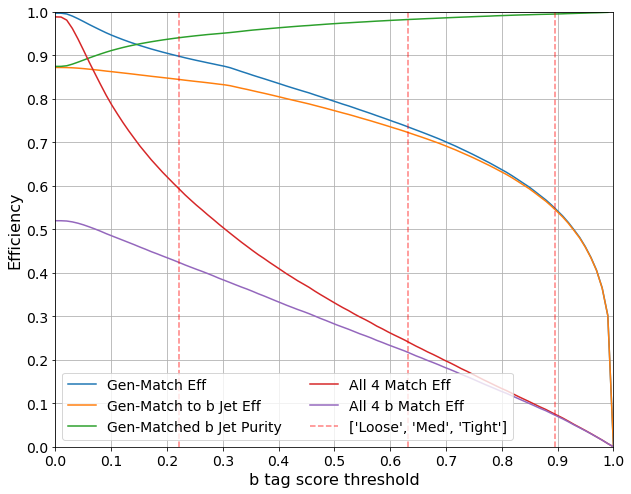

In [4]:
btag_thresh = np.linspace(0,1,num=100)
match_effs = []
match_bJet_effs = []
match_bJet_purity = []
all4_match_effs = []
all4_match_bJet_effs = []

for t in btag_thresh:
    c1 = match1 & (df["jet1_btagscore"] >= t)
    c1_bJet = match1_bJet & (df["jet1_btagscore"] >= t)
    c2 = match2 & (df["jet2_btagscore"] >= t)
    c2_bJet = match2_bJet & (df["jet2_btagscore"] >= t)
    c3 = match3 & (df["jet3_btagscore"] >= t)
    c3_bJet = match3_bJet & (df["jet3_btagscore"] >= t)
    c4 = match4 & (df["jet4_btagscore"] >= t)
    c4_bJet = match4_bJet & (df["jet4_btagscore"] >= t)
    
    nc = len(df["jet1_pt"][c1]) + len(df["jet2_pt"][c2]) + len(df["jet3_pt"][c3]) + len(df["jet4_pt"][c4])
    nc_bJet = len(df["jet1_pt"][c1_bJet]) + len(df["jet2_pt"][c2_bJet]) + len(df["jet3_pt"][c3_bJet]) + len(df["jet4_pt"][c4_bJet])
    nc_all4 = np.count_nonzero((c1 & c2 & c3 & c4).values)
    nc_bJet_all4 = np.count_nonzero((c1_bJet & c2_bJet & c3_bJet & c4_bJet).values)
    
    match_effs.append(nc/(4*nEvents))
    match_bJet_effs.append(nc_bJet/(4*nEvents))
    match_bJet_purity.append(nc_bJet/nc) if nc > 0 else match_bJet_purity.append(None)
    all4_match_effs.append(nc_all4/nEvents)
    all4_match_bJet_effs.append(nc_bJet_all4/nEvents)
    
plt.figure(1,figsize=(10,8))
plt.plot(btag_thresh,match_effs,label="Gen-Match Eff")
plt.plot(btag_thresh,match_bJet_effs,label="Gen-Match to b Jet Eff")
plt.plot(btag_thresh,match_bJet_purity,label="Gen-Matched b Jet Purity")
plt.plot(btag_thresh,all4_match_effs,label="All 4 Match Eff")
plt.plot(btag_thresh,all4_match_bJet_effs,label="All 4 b Match Eff")

plt.xlim([0,1])
plt.xticks(ticks=np.arange(0,1.1,0.1),fontsize=14)
plt.xlabel("b tag score threshold",fontsize=16)
plt.ylim([0,1])
plt.yticks(ticks=np.arange(0,1.1,0.1),fontsize=14)
plt.ylabel("Efficiency",fontsize=16)
plt.grid()
plt.vlines([0.2219,0.6324,0.8958],0,1,label=["Loose","Med","Tight"],colors='red',linestyles='dashed',alpha=0.5)
plt.legend(loc="lower left",fontsize=14,ncol=2)
plt.savefig("HH_candidates/reco_match_eff_by_bTag_thresh.pdf")
## 2016 DeepCSV WPs from here https://twiki.cern.ch/twiki/bin/viewauth/CMS/BtagRecommendation80XReReco

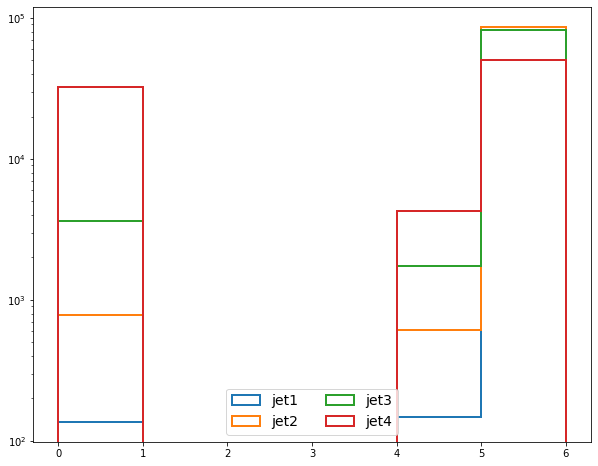

In [5]:
plt.figure(2,figsize=(10,8))
plt.hist(df["genjet1_hadronFlavour"].values,bins=np.arange(0,7,step=1),histtype='step',linewidth=2,label='jet1')
plt.hist(df["genjet2_hadronFlavour"].values,bins=np.arange(0,7,step=1),histtype='step',linewidth=2,label='jet2')
plt.hist(df["genjet3_hadronFlavour"].values,bins=np.arange(0,7,step=1),histtype='step',linewidth=2,label='jet3')
plt.hist(df["genjet4_hadronFlavour"].values,bins=np.arange(0,7,step=1),histtype='step',linewidth=2,label='jet4')
plt.yscale("log")
plt.legend(loc="lower center",fontsize=14,ncol=2)

In [ ]:
ROOT.Math.PtEtaPhiMVector as pepmv
plt.figure(3,figsize=(10,8))
loose = (df["jet1_btagscore"] >= 0.2219) & (df["jet2_btagscore"] >= 0.2219) & (df["jet3_btagscore"] >= 0.2219) & (df["jet4_btagscore"] >= 0.2219)
med = (df["jet1_btagscore"] >= 0.6324) & (df["jet2_btagscore"] >= 0.6324) & (df["jet3_btagscore"] >= 0.6324) & (df["jet4_btagscore"] >= 0.6324)
tight = (df["jet1_btagscore"] >= 0.8958) & (df["jet2_btagscore"] >= 0.8958) & (df["jet3_btagscore"] >= 0.8958) & (df["jet4_btagscore"] >= 0.8958)


In [6]:
import ROOT 

Welcome to JupyROOT 6.24/02


In [9]:
ROOT.Math.PtEtaPhiMVector

<class cppyy.gbl.ROOT.Math.LorentzVector<ROOT::Math::PtEtaPhiM4D<double> > at 0x55f72628c2e0>